<a href="https://colab.research.google.com/github/mkounkel/Auriga/blob/master/Lab_10_finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting Function
The next cell defines a python function called make_plot that can be used to create the required plots for each of the mathematical functions you will be expanding as Fourier series for this lab. **Don't forget that you need to add axis labels for every plot, which are not yet created in this function.**

Below is the list of arguments required for the function and their types and meanings

**base_function**: Function that is the base function you will be expanding as a Fourier series

**c0_func**: Function that gives the average value of your base periodic function over one period

**an_func**: Function that gives the cosine components as a function of n for the periodic function

**bn_func**: Function that gives the sine components as a function of n for the periodic function

**cn_func**: Function that gives the complex exponential components as a function of n for the periodic function

**period**: A single float that represents the fundamential period that is used to describe periodicity of the function.  Remember that a period function is such that $f(x+L)=f(x)$ is $L$ is the period.

**shift**: This is the shift in the range your periodic function is defined over relative to range the range $(0,L)$.  Remember that a periodic function can be defined over any range of length $L$.  This will also define integral range used to compute the Fourier components.  As an example, if your base periodic function is defined over the range $\left(-\frac{L}{2},\frac{L}{2}\right)$  you would pass $-\frac{L}{2}$ as the argument for shift.

**n_start**: This should be the first term to be included in the Fourier series.  In conjunction with delta_n, you can make it so that you only compute the odd integers components, or the even integer components, in the Fourier series.

**delta_n**: The jump between each of the terms included in the fourier series.  This variable is there in case you wanted to get only the odd (or even) integers, in which case you would pass 2 for delta_n.  

**x_values**: Should be an array of floats that represent the $x$ coordinates that will be used in constructing all of the plots

**nmax_array**: Should be an array of integers.  The number of elements will be the number of plots created for the sine-cosine and complex exponential Fourier series. In each plot, the value in nmax_array which will represent the maximum number of terms that will computed in the Fourier series.


In [44]:
def make_plot(base_function,c0_func,an_func,bn_func,cn_func,
              period=1,shift=-0.5,n_start=1,delta_n=1,x_values=np.linspace(-2,2,1000),nmax_array=[1,5,10,100]):
    for nmax in nmax_array:
        nvalues=np.arange(n_start,nmax+delta_n,delta_n)
        base_values=base_function(x_values,period,shift)

        an=an_func(nvalues)
        bn=bn_func(nvalues)
        cn=cn_func(nvalues)
        c_neg_n=cn_func(-nvalues)
        c0=c0_func()
        y=np.zeros(len(x_values))

        for i in range(0,len(x_values)):
            y[i]=c0+sum(an*np.cos(2*np.pi*nvalues*x_values[i]/period)+bn*np.sin(2*np.pi*nvalues*x_values[i]/period))
        plt.plot(x_values,y,color='r') # this is the graph of the Fourier series approximation
        plt.plot(x_values,base_values,linestyle='--',linewidth=2,color='k') # this is the graph of the original function
        plt.ylim([min(base_values)-0.1,max(base_values)+0.1])
        if nmax > 1:
            title = str(nmax)+' terms in the sine-cosine Fourier series'
        else:
            title = '1 term in the sine-cosine Fourier series'
        plt.title(title)
        plt.show() # show the plot

        for i in range(0,len(x_values)):
            y[i]=c0+sum(cn*np.exp(2j*np.pi*nvalues*x_values[i]/period)+c_neg_n*np.exp(-2j*np.pi*nvalues*x_values[i]/period))
        plt.plot(x_values,y,color='r') # this is the graph of the Fourier series approximation
        plt.plot(x_values,base_values,linestyle='--',linewidth=2,color='k') # this is the graph of the original function
        plt.ylim([min(base_values)-0.1,max(base_values)+0.1])
        if nmax > 1:
            title = str(nmax)+' terms in the exponential Fourier series'
        else:
            title = '1 term in the exponential Fourier series'
        plt.title(title)
        plt.show() # show the plot

The first two functions are implemented for you as an example. You will need to implement the remaining functions yourself through manually evaluating all of the integrals and implementing the resulting coefficients into functions.

# Function 1

$$ f_1=\begin{cases}
      1 & |x|\leq \frac{L}{4} \\
      0 & \mathrm{otherwise}
   \end{cases}
$$

Where $x$ is defined over the range $-\frac{L}{2}\leq x \leq \frac{L}{2}$

For this function the complex exponential components are calculated first, and then the sine and cosine components are based upon that formula.   Note that this is the first example function given in the Before-Lecture Assignments for the Lecture on complex exponential basis for Fourier series.

In [19]:
# This the version of the function that takes one single value for x
# The % operator is called the modulo or remainder operator and will give the remainder/decimal piece when dividing two numbers
def f1(x,period,shift):

    x1=(x - shift) % period + shift
    value=np.zeros_like(x1)

    a=np.where(abs(x1) < period/4)[0]
    value[a]=1

    return value


# Coefficients for the exponential Fourier series
def cn_1(nvalues):
    return (-1)**((nvalues-1)/2)*f0/(nvalues*np.pi)

# Coefficients for the cosine Fourier series
def an_1(nvalues):
    return 2*cn_1(nvalues)

# Coefficients for the sine Fourier series
def bn_1(nvalues):
    return 0

def c0_1():
    return 1/2.


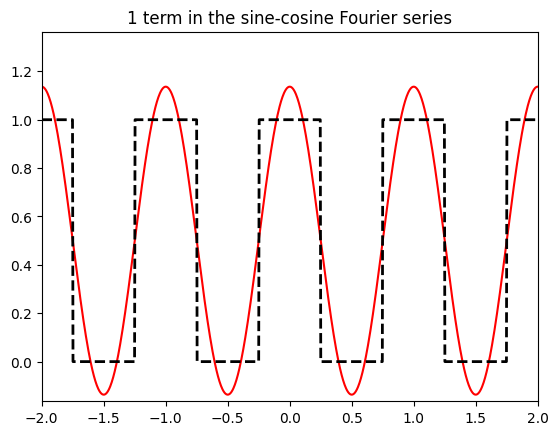

<ipython-input-18-9b3000578b69>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i]=c0+sum(cn*np.exp(2j*np.pi*nvalues*x_values[i]/period)+c_neg_n*np.exp(-2j*np.pi*nvalues*x_values[i]/period))


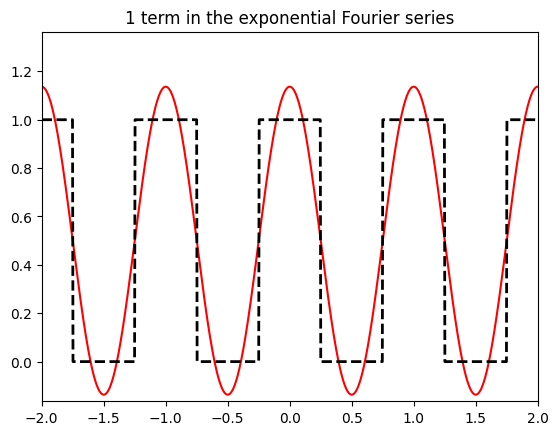

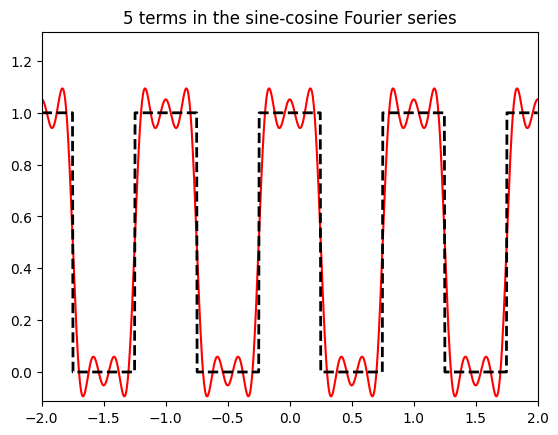

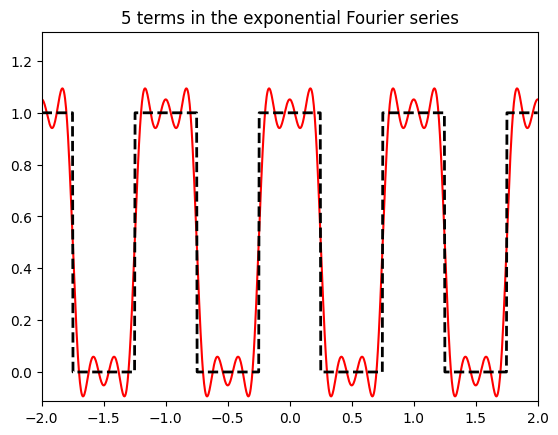

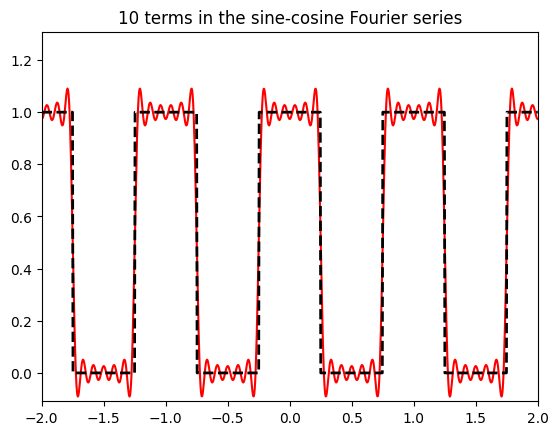

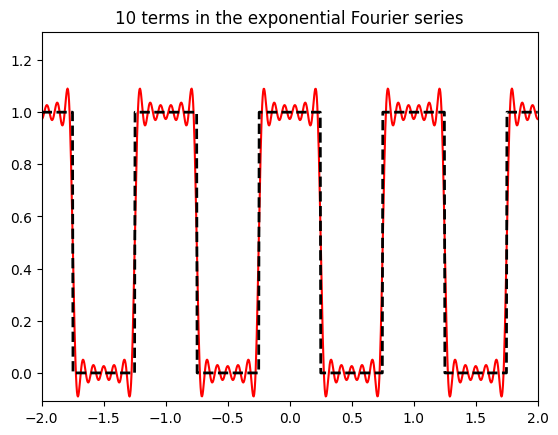

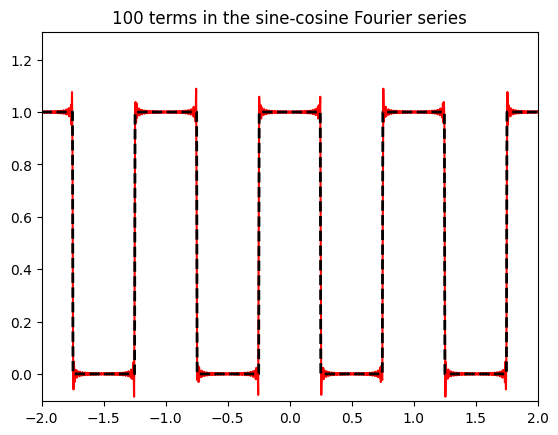

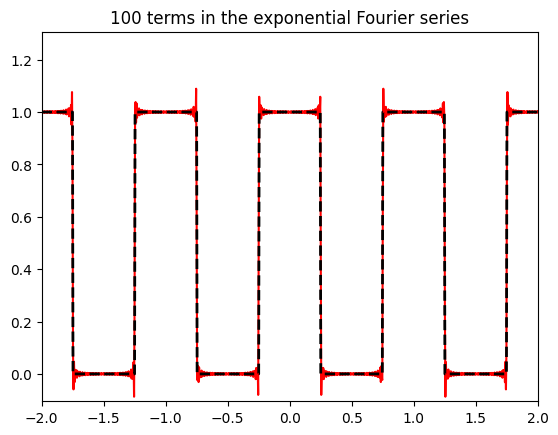

In [20]:
period=1   # the period of the function
nmax_array=[1,5,10,100]
x = np.linspace(-2*period,2*period,1000) # 1000 linearly spaced numbers

make_plot(f1,c0_1,an_1,bn_1,cn_1,period=period,shift=-period/2,n_start=1,delta_n=2,x_values=x)

**Don't forget that this set of plots needs a description/caption!**

# Function 2

$$ f_2=\begin{cases}
      0 & x< 0 \\
      x & x> 0
   \end{cases}
$$

Where $x$ is defined over the range $-\frac{L}{2}\leq x \leq \frac{L}{2}$

For this function the sine and cosine components are calculated first, and then the complex exponential components are based upon that formula.   Note that this is the 3rd example function given in the Before-Lecture Assignments for the Lecture on sine-cosine basis for Fourier series.

In [25]:
# This the version of the function that takes one single value for x
# The % operator is called the modulo or remainder operator and will give the remainder/decimal piece when dividing two numbers

def f2(x,period,shift):

    x1=(x - shift) % period + shift
    value=np.zeros_like(x1)

    a=np.where(x1>0)[0]
    value[a]=x1[a]

    return value

def an_2(nvalues):
    return ((-1.)**nvalues - 1)/(2*nvalues**2*np.pi**2)

def bn_2(nvalues):
    return (-1.)**(nvalues + 1)/(2*nvalues*np.pi)

def cn_2(nvalues):
    return 0.5*(an_2(nvalues)-1j*bn_2(nvalues))

def c0_2():
    return 1/8.


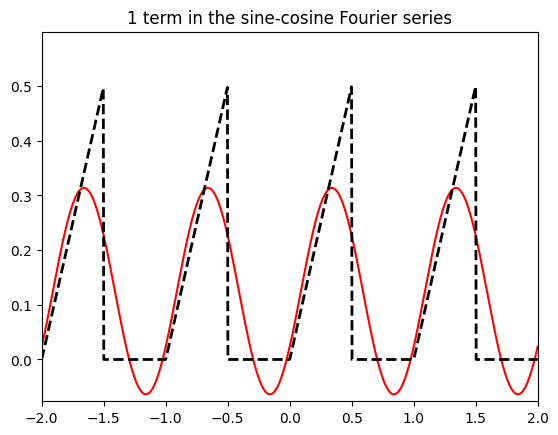

<ipython-input-18-9b3000578b69>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i]=c0+sum(cn*np.exp(2j*np.pi*nvalues*x_values[i]/period)+c_neg_n*np.exp(-2j*np.pi*nvalues*x_values[i]/period))


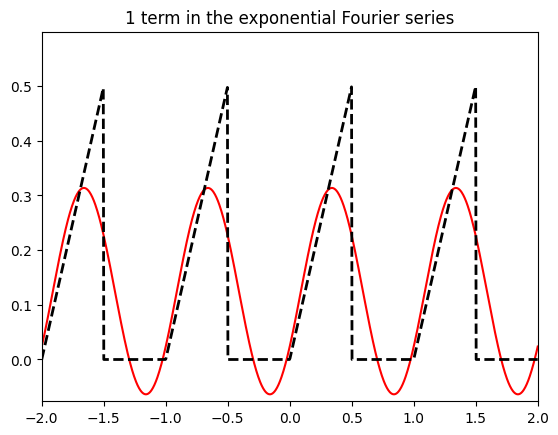

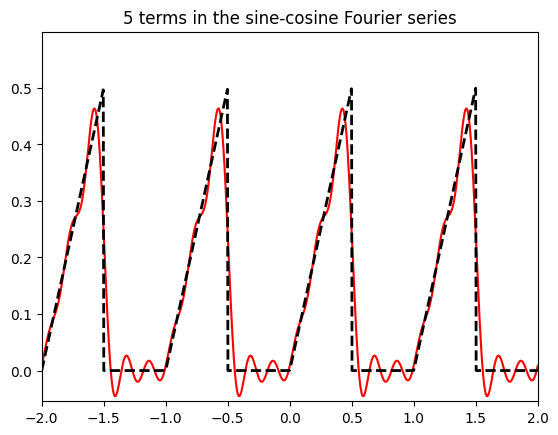

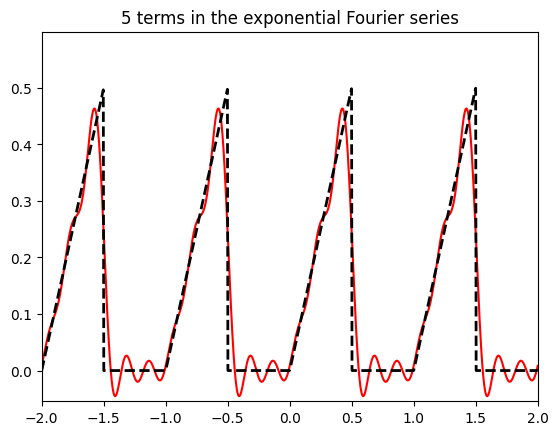

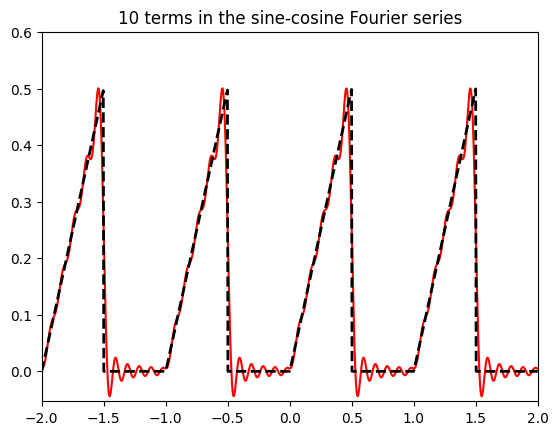

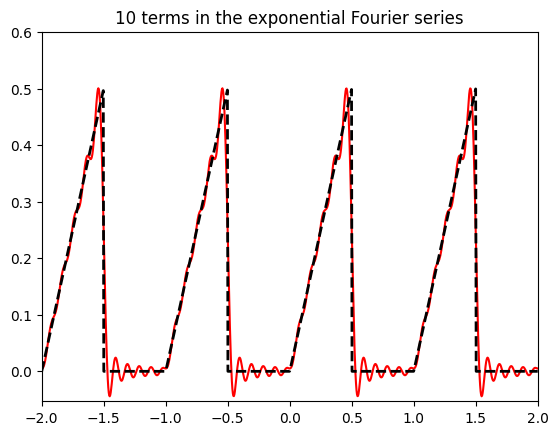

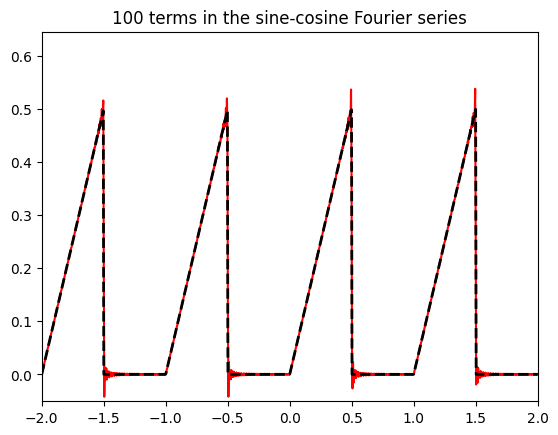

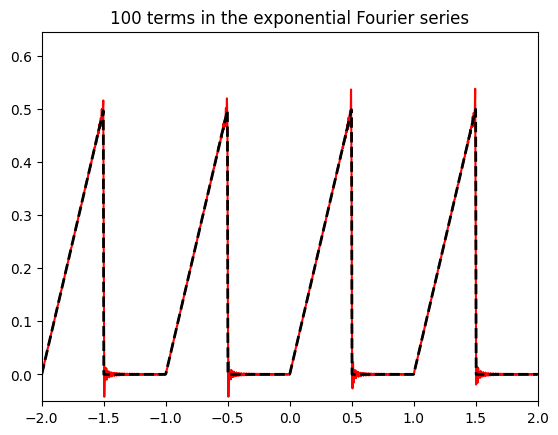

In [26]:
period=1   # the period of the function
nmax_array=[1,5,10,100]
x = np.linspace(-2*period,2*period,1000) # 1000 linearly spaced numbers
make_plot(f2,c0_2,an_2,bn_2,cn_2,period=period,shift=-period/2,n_start=1,delta_n=1,x_values=x)

**Don't forget that this set of plots needs a description/caption!**

# Function 3

$$ f_3=\begin{cases}
      1 & x< L/4 \\
      0 & \mathrm{otherwise}
   \end{cases}
$$

Where $x$ is defined over the range $0\leq x \leq L$

Note that this function appeared in the In-Class activities.

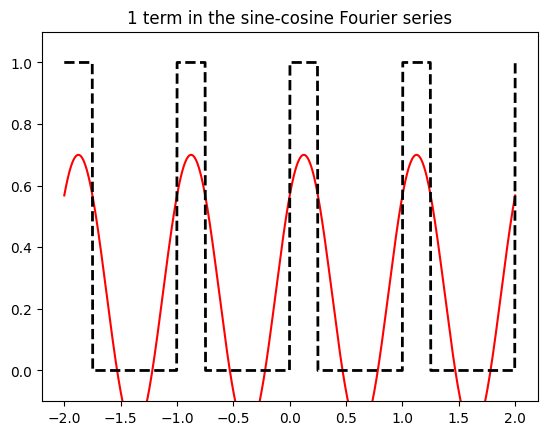

<ipython-input-44-2135cc93134e>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i]=c0+sum(cn*np.exp(2j*np.pi*nvalues*x_values[i]/period)+c_neg_n*np.exp(-2j*np.pi*nvalues*x_values[i]/period))


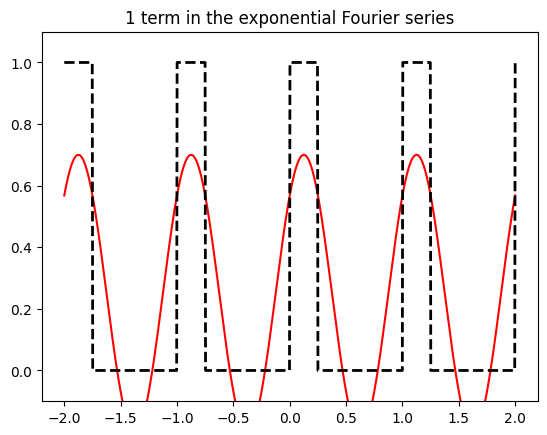

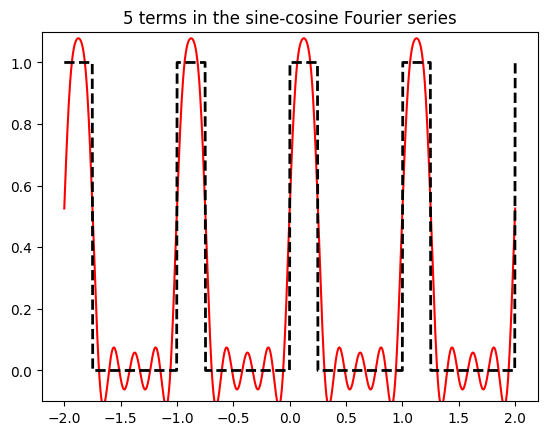

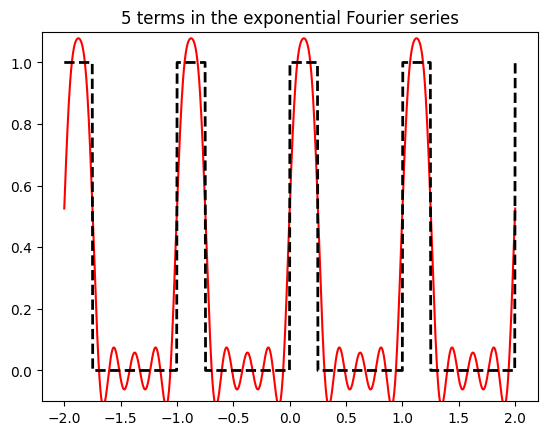

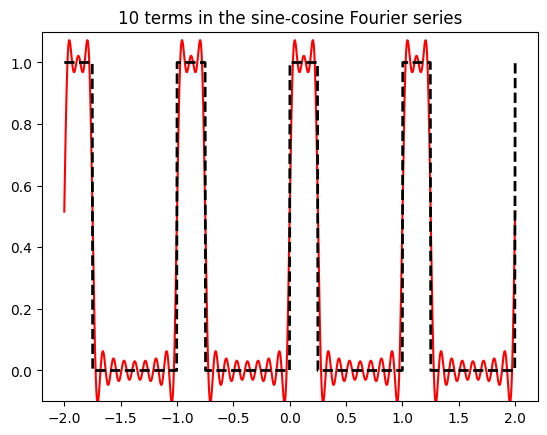

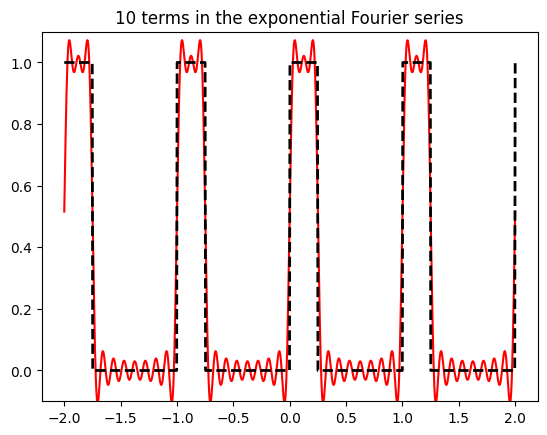

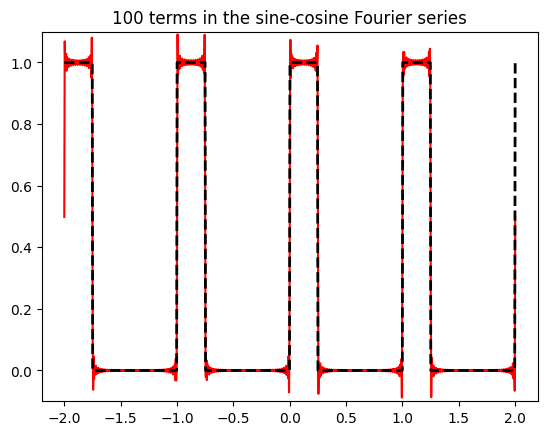

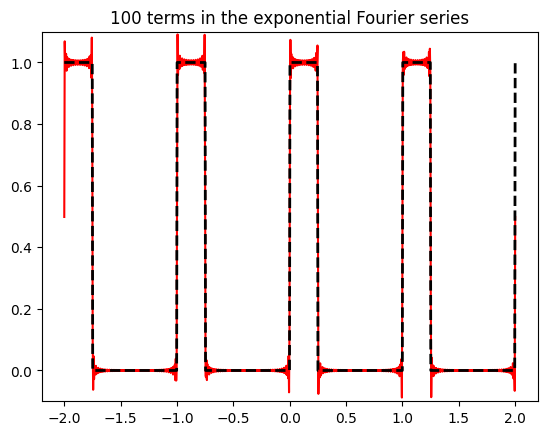

In [53]:
# This the version of the function that takes one single value for x
# The % operator is called the modulo or remainder operator and will give the remainder/decimal piece when dividing two numbers

def f3(x,period,shift):
    x1=(x - shift) % period + shift
    value=np.zeros_like(x1)
    a=np.where(x1<period/4)[0]
    value[a]=1
    return value

def an_3(nvalues):
    return (1/(np.pi*nvalues))*np.sin((np.pi*nvalues)/2)

def bn_3(nvalues):
    return -1/(np.pi*nvalues)*np.cos((np.pi*nvalues)/2)+1/(np.pi*nvalues)

def cn_3(nvalues):
    return (-(f0/(2*np.pi*1j*nvalues))*((np.exp((-np.pi*1j*nvalues)/2))-(1)))

def c0_3():
    return 1/4
period=1   # the period of the function
nmax_array=[1,5,10,100]
x = np.linspace(-2*period,2*period,1000) # 1000 linearly spaced numbers
make_plot(f3,c0_3,an_3,bn_3,cn_3,period=period,shift=0,n_start=1,delta_n=1,x_values=x)

# Function 4

$$ f_4=\begin{cases}
      -1 & -\frac{L}{2}<x< \frac{L}{4} \\
      1 & \mathrm{otherwise}
   \end{cases}
$$

Where $x$ is defined over the range $-\frac{L}{2}\leq x \leq \frac{L}{2}$

Note that this function appeared in the In-Class activities.

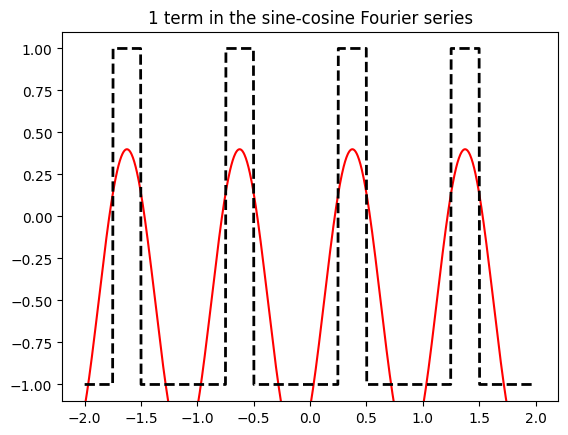

<ipython-input-44-2135cc93134e>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i]=c0+sum(cn*np.exp(2j*np.pi*nvalues*x_values[i]/period)+c_neg_n*np.exp(-2j*np.pi*nvalues*x_values[i]/period))


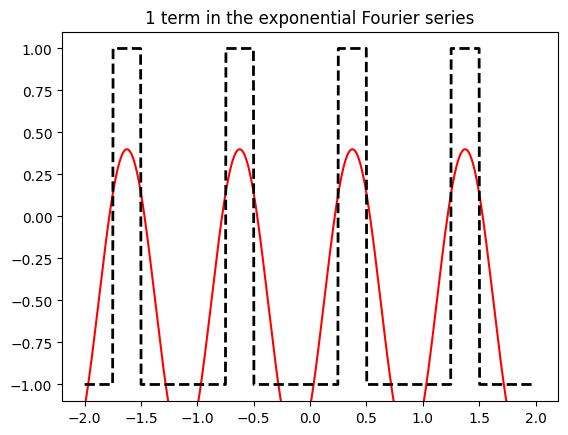

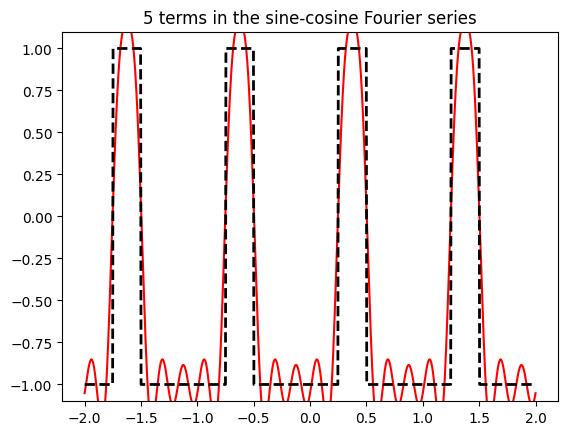

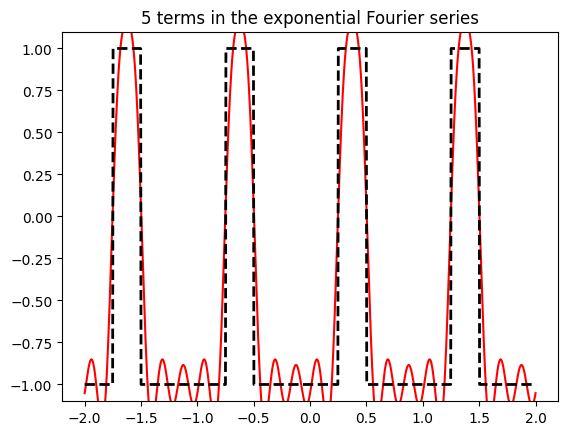

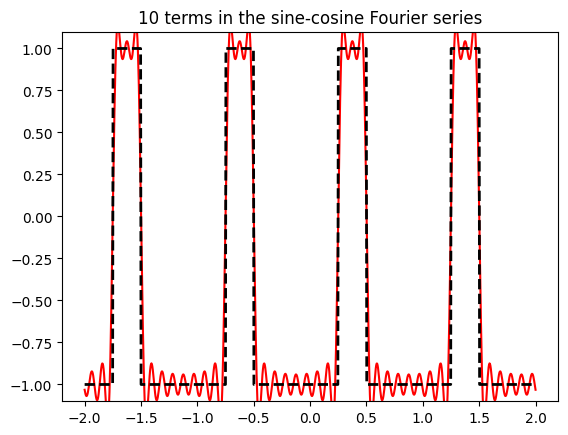

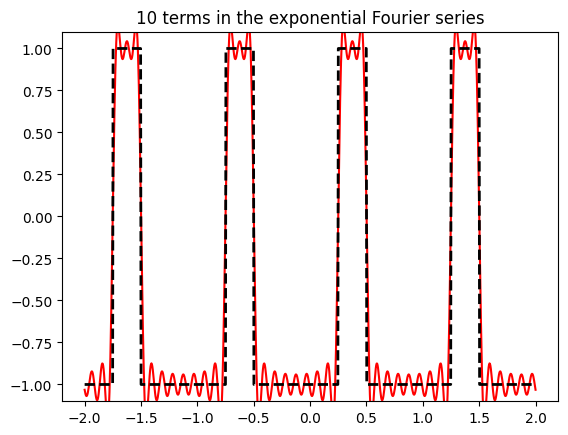

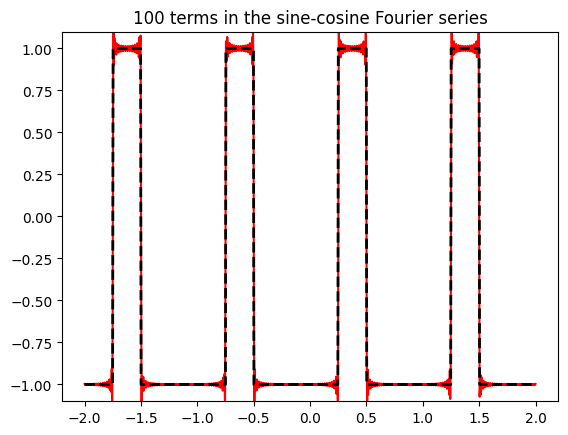

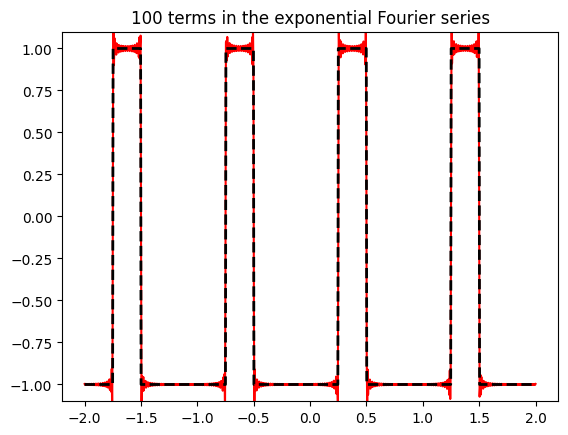

In [54]:
# This the version of the function that takes one single value for x
# The % operator is called the modulo or remainder operator and will give the remainder/decimal piece when dividing two numbers

def f4(x,period,shift):
    x1=(x - shift) % period + shift
    value=np.zeros_like(x1)
    value=value+1
    a=np.where((x1>-period/2) & (x1<period/4))[0]
    value[a]=-1
    return value

def an_4(nvalues):
    return (-2/(np.pi*nvalues))*np.sin((np.pi*nvalues)/2)

def bn_4(nvalues):
    return (-2/(np.pi*nvalues))*((-1.)**nvalues) + (2/(np.pi*nvalues))*np.cos((nvalues*np.pi)/2)

def cn_4(nvalues):
    return (1/(2*np.pi*1j*nvalues))*((np.exp((-5*np.pi*1j*nvalues)/2))+(np.exp((-5*np.pi*1j*nvalues)/2))-(np.exp((-np.pi*1j*nvalues)))-(np.exp((-3*np.pi*1j*nvalues))))

def c0_4():
    return -1/2
period=1   # the period of the function
nmax_array=[1,5,10,100]
x = np.linspace(-2*period,2*period,1000) # 1000 linearly spaced numbers
make_plot(f4,c0_4,an_4,bn_4,cn_4,period=period,shift=-period/2,n_start=1,delta_n=1,x_values=x)

# Function 5

$$ f_5=x^2
$$

Where $x$ is defined over the range $-\pi\leq x \leq \pi$ (i.e, $L=2\pi$)

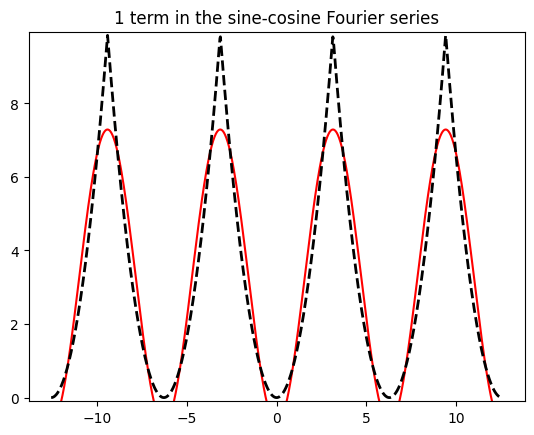

<ipython-input-44-2135cc93134e>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i]=c0+sum(cn*np.exp(2j*np.pi*nvalues*x_values[i]/period)+c_neg_n*np.exp(-2j*np.pi*nvalues*x_values[i]/period))


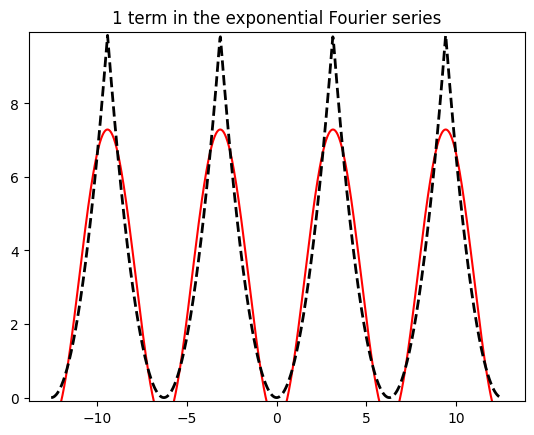

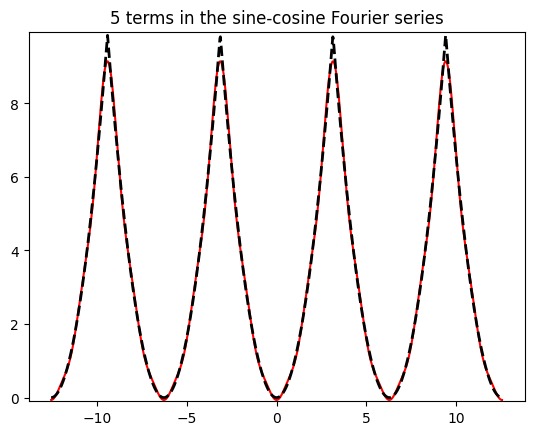

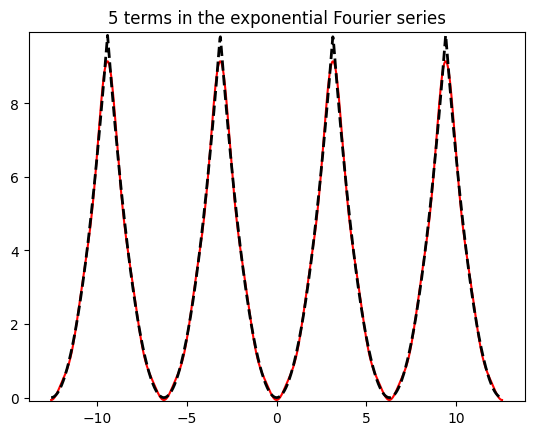

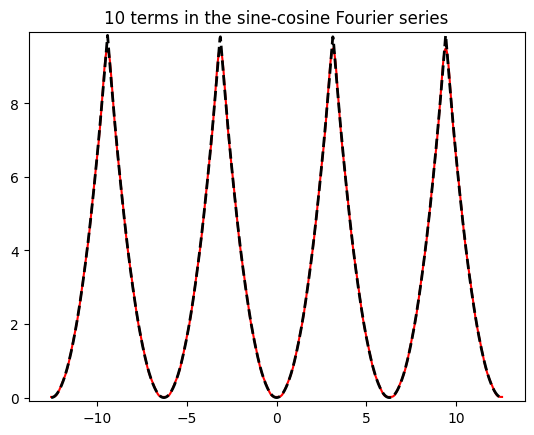

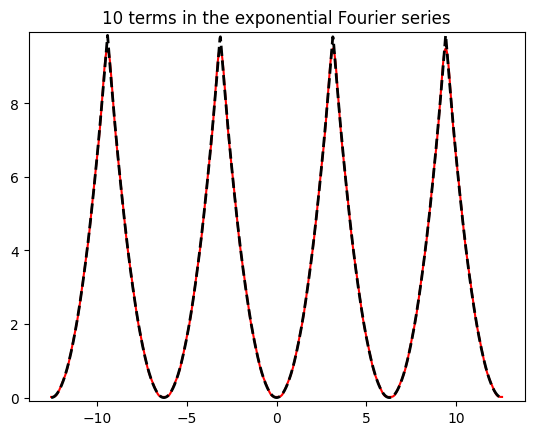

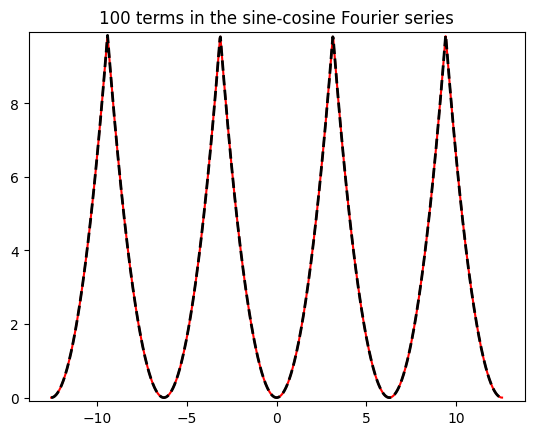

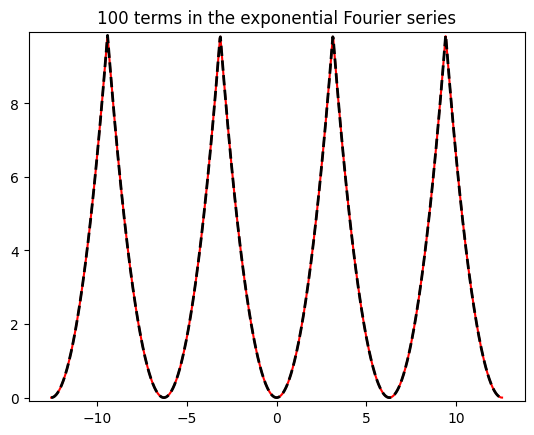

In [55]:
# This the version of the function that takes one single value for x
# The % operator is called the modulo or remainder operator and will give the remainder/decimal piece when dividing two numbers

def f5(x,period,shift):
    x1=(x - shift) % period + shift
    value=x1**2
    return value

def an_5(nvalues):
    return (4*np.cos(nvalues*np.pi))/nvalues**2

def bn_5(nvalues):
    return 0

def cn_5(nvalues):
    return ((2*np.cos(nvalues*np.pi))/(nvalues**2))

def c0_5():
    return (np.pi**2)/3
period=2*np.pi   # the period of the function
nmax_array=[1,5,10,100]
x = np.linspace(-2*period,2*period,1000) # 1000 linearly spaced numbers
make_plot(f5,c0_5,an_5,bn_5,cn_5,period=period,shift=-period/2,n_start=1,delta_n=1,x_values=x)

# Function 6

$$ f_6=x^2
$$

Where $x$ is defined over the range $0\leq x \leq 2\pi$ (i.e, $L=2\pi$)

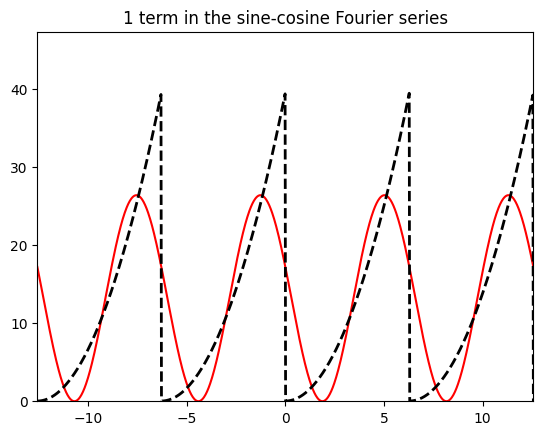

<ipython-input-18-9b3000578b69>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i]=c0+sum(cn*np.exp(2j*np.pi*nvalues*x_values[i]/period)+c_neg_n*np.exp(-2j*np.pi*nvalues*x_values[i]/period))


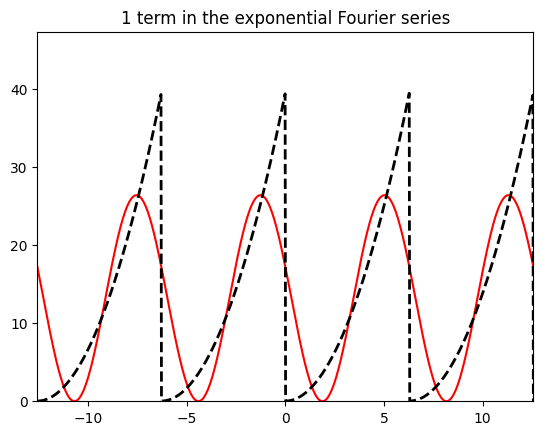

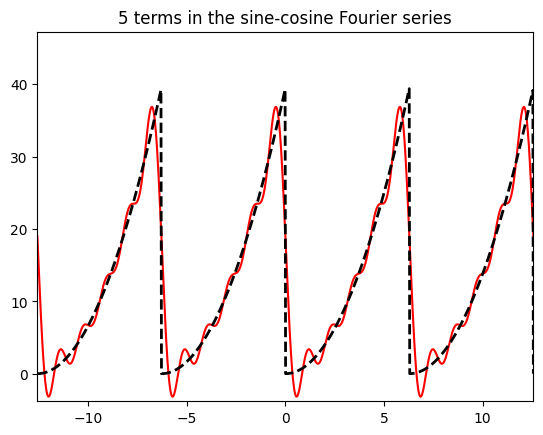

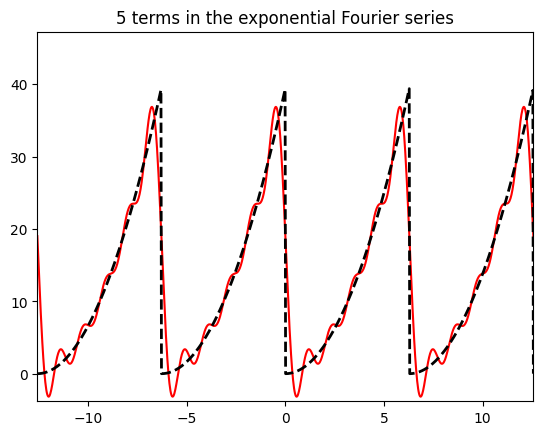

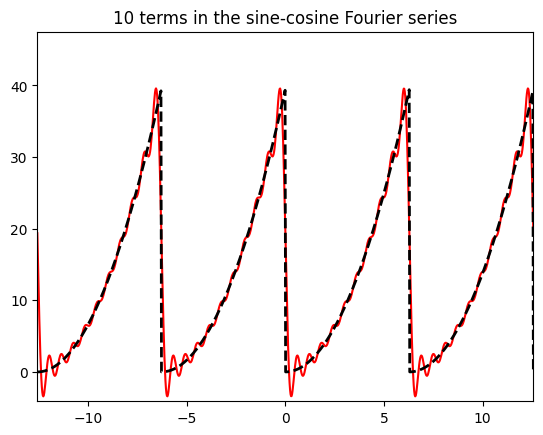

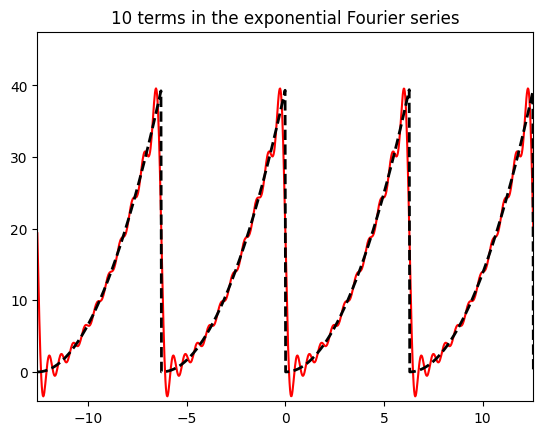

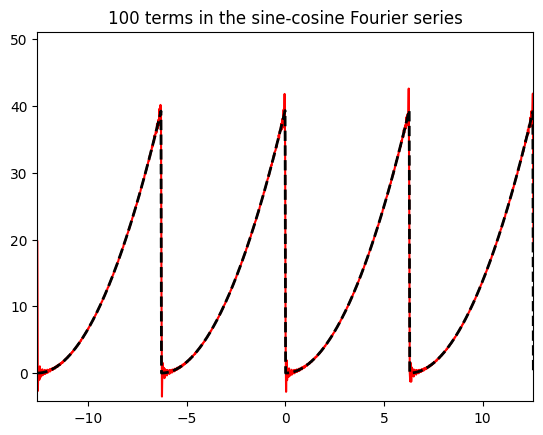

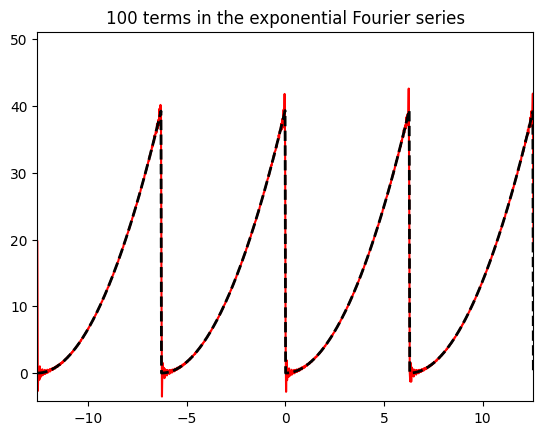

In [39]:
# This the version of the function that takes one single value for x
# The % operator is called the modulo or remainder operator and will give the remainder/decimal piece when dividing two numbers

def f6(x,period,shift):
    x1=(x - shift) % period + shift
    value=x1**2
    return value

def an_6(nvalues):
    return 4/nvalues**2

def bn_6(nvalues):
    return (-4*np.pi)/nvalues

def cn_6(nvalues):
    return 0.5*(an_6(nvalues)-1j*bn_6(nvalues))

def c0_6():
    return 4/3*np.pi**2
period=2*np.pi   # the period of the function
nmax_array=[1,5,10,100]
x = np.linspace(-2*period,2*period,1000) # 1000 linearly spaced numbers
make_plot(f6,c0_6,an_6,bn_6,cn_6,period=period,shift=0,n_start=1,delta_n=1,x_values=x)

# Extra Credit

$$ f_7=\begin{cases}
      0 & x\leq 0 \\
      \sin x & x> 0
   \end{cases}
$$

Where $x$ is defined over the range $-\pi\leq x \leq \pi$ (i.e, $L=2\pi$)

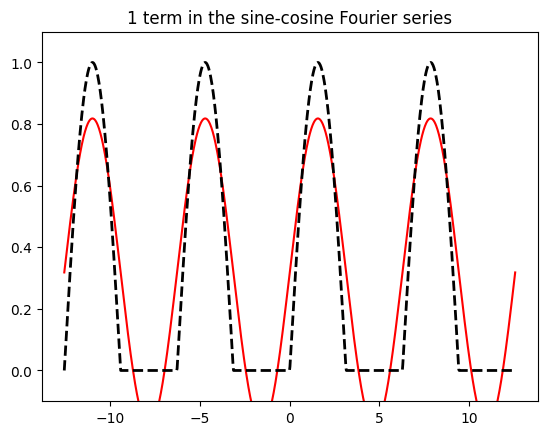

<ipython-input-44-2135cc93134e>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i]=c0+sum(cn*np.exp(2j*np.pi*nvalues*x_values[i]/period)+c_neg_n*np.exp(-2j*np.pi*nvalues*x_values[i]/period))


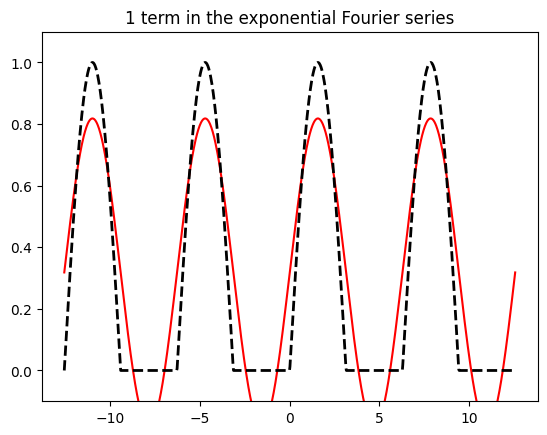

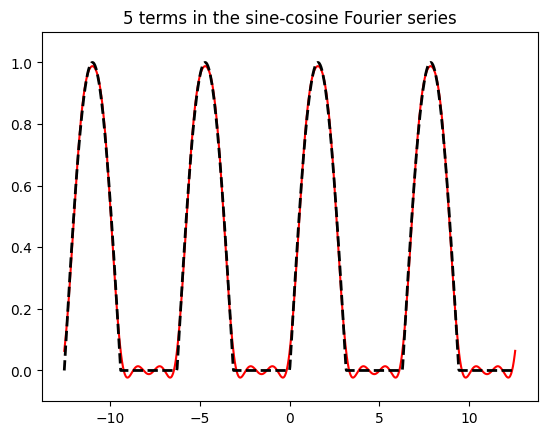

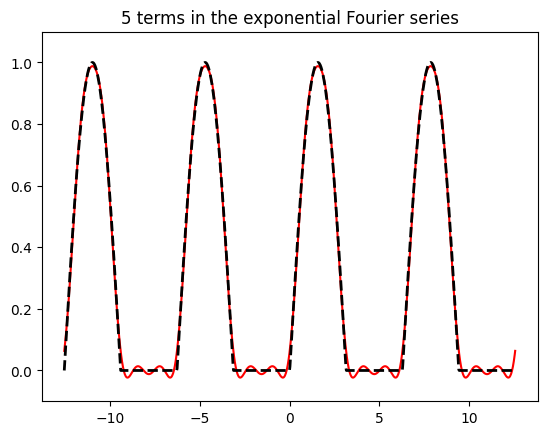

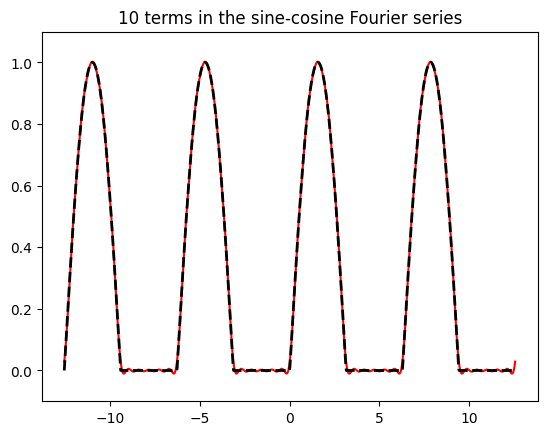

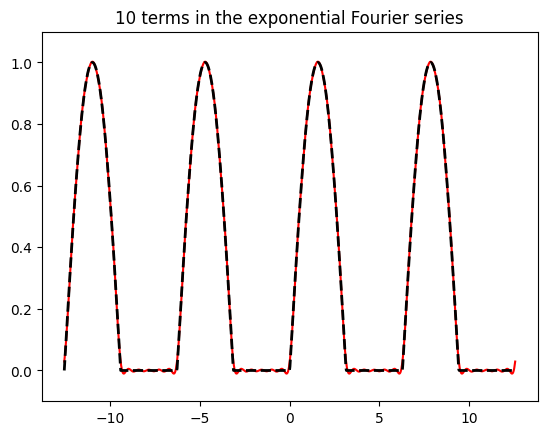

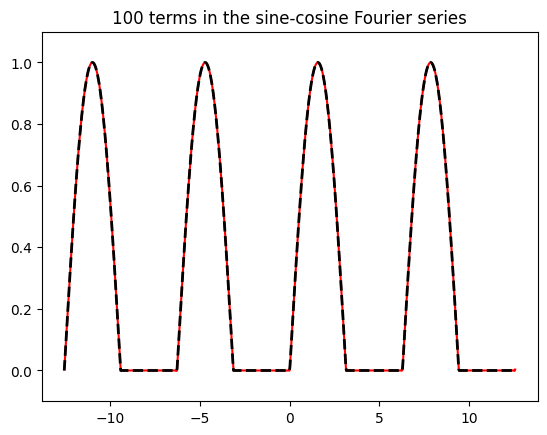

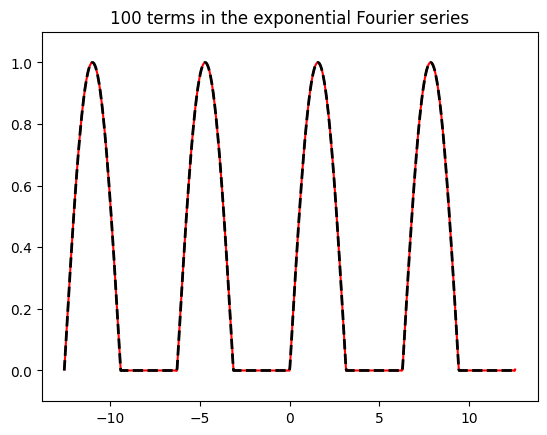

In [52]:
# This the version of the function that takes one single value for x
# The % operator is called the modulo or remainder operator and will give the remainder/decimal piece when dividing two numbers

def f7(x,period,shift):
    x1=(x - shift) % period + shift
    value=np.zeros_like(x1)
    a=np.where(x1>0)[0]
    value[a]=np.sin(x1[a])
    return value

def an_7(nvalues):
    values=[]
    for n in nvalues:
     if abs(n > 1):
      values.append((np.cos(np.pi*n)+1)/(1-n**2)/np.pi)
     else:
      values.append(0)
    return np.array(values)

def bn_7(nvalues):
    values=[]
    for n in nvalues:
     if abs(n > 1):
      values.append(np.sin(np.pi*n)/(1-n**2)/np.pi)
     else:
      values.append(0.5)
    return np.array(values)


def cn_7(nvalues):
    value=[]
    for n in nvalues:
      if abs(n)>1:
        value.append((((np.cos(np.pi*n)+1)/(np.pi*(1-(n**2))))+((-1j)*(((-1)*(np.sin(np.pi*n)))/(np.pi*((n**2)-1)))))/2)
      else:
        value.append((-n*1j)/4)
    return np.array(value)

def c0_7():
    return 1/np.pi

period=2*np.pi   # the period of the function
nmax_array=[1,5,10,100]
x = np.linspace(-2*period,2*period,1000) # 1000 linearly spaced numbers
make_plot(f7,c0_7,an_7,bn_7,cn_7,period=period,shift=-period/2,n_start=1,delta_n=1,x_values=x)